# Part I - Ford GoBike System Data Exploration
## by Emmanuel Jonah

## Table of Contents
<ul>
    <li><a href="#preliminary-wrangling">Preliminary Wrangling</a></li>
    <li><a href="#gathering-data">Gathering Data</a></li>
    <li><a href="#assessing-data">Assessing Data</a></li>
    <li><a href="#cleaning-data">Cleaning Data</a></li>
    <li><a href="#univariate-exploration">Univariate Exploration</a></li>
    <ul>
        <li><a href="#duration-distribution">Distribution of Duration</a></li>
        <li><a href="#average-diff-start-end-time">Difference in Average of Hourly Trip Start and End Count</a></li>
        <li><a href="#user-type-distribution"> User Type Distribution</a></li>
        <li><a href="#gender-distribution">Gender Distribution</a></li>
        <li><a href="#gender-day-of-week-distribution">Gender Count by Day of Week</a></li>
        <li><a href="#trip-day-proportion">Proportion of Trips for Each Day</a></li>
        <li><a href="#social-generations-proportions">Social Generation Proportions</a></li>
        <li><a href="#top-10-start-stations">Top 10 Start Stations</a></li>
        <li><a href="#top-10-end-stations">Top 10 End Stations</a></li>
        <li><a href="#day-crossover-trips">Day Crossover Trips</a></li>
    </ul>
    <li><a href="#bivariate-exploration">Bivariate Exploration</a></li>
    <ul>
        <li><a href="#rel-age-duration-min">Relationship between Age and Duration of Trip</a></li>
        <li><a href="#each-day-top-5-start-stations">Top 5 Start Stations for Days of Week</a></li>
        <li><a href="#each-day-top-5-end-stations">Top 5 End Stations for Days of Week</a></li>
        <li><a href="#day-of-week-by-social-generation">Day of Week by Social Generation</a></li>
    </ul>
    <li><a href="#multivariate-exploration">Multivariate Exploration</a></li>
    <ul>
        <li><a href="#top-5-start-stations-day-trend">Hourly Trend for top 5 Start Stations by Day of Week</a></li>
        <li><a href="#top-5-start-stations-day-user-type-trend">Trend for top 5 Start Stations by Day of Week and User Type</a></li>
    </ul>
</ul>

<a id="intro"></a>

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from 1st to 28th February 2019. It contains about 183,000 individual trip records. The attributes include: duration, start and end times, start and end stations, membership type and gender and id of the bike used.

<a id="preliminary-wrangling"></a>
    
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
from datetime import date

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id="gathering-data"></a>

### Gathering data

In [2]:
# load in the dataset into a pandas dataframe, print statistics
ford_gobike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id="assessing-data"></a>

### Assessing data

In [3]:
# high-level overview of data shape and composition
print(ford_gobike_data.shape)

(183412, 16)


In [4]:
print(ford_gobike_data.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
ford_gobike_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
# descriptive statistics for numeric variables
ford_gobike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
categorical_cols = [cname for cname in ford_gobike_data.columns if ford_gobike_data[cname].dtype == "object"]

categorical_cols

['start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip']

In [8]:
ford_gobike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
ford_gobike_data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
for vv in ["user_type", "member_gender", "bike_share_for_all_trip"]:
    print(ford_gobike_data[vv].unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


<a id="cleaning-data"></a>

### Cleaning data

Remove all records with missing values in any of the columns

In [11]:
ford_gobike_data = ford_gobike_data.dropna()

Convert _start_time_ and _end_time_ to datetime type

In [12]:
ford_gobike_data["start_time"] = pd.to_datetime(ford_gobike_data["start_time"])
ford_gobike_data["end_time"] = pd.to_datetime(ford_gobike_data["end_time"])
ford_gobike_data["start_station_name_min"] = ford_gobike_data["start_station_name"].str.slice(stop=15)

Create _duration_min_ from _duration_sec_

In [13]:
ford_gobike_data["duration_min"] = (ford_gobike_data["duration_sec"] / 60)

In [14]:
ford_gobike_data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_station_name_min     0
duration_min               0
dtype: int64

Day names of the week in order

In [15]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Find the _start_day_name_ and _end_day_name_

In [16]:
ford_gobike_data["start_day_name"] = ford_gobike_data["start_time"].dt.day_name()
ford_gobike_data["end_day_name"] = ford_gobike_data["end_time"].dt.day_name()
ford_gobike_data["start_day"] = ford_gobike_data["start_time"].dt.dayofweek
ford_gobike_data["start_day"] = ford_gobike_data["start_day"].replace(np.arange(7), day_names)
ford_gobike_data["start_hour"] = ford_gobike_data["start_time"].dt.hour

Calculating age and social generation of biker

The age and soical generation of each biker of each record is determined. The social generation is based on information from wikipedia [here](https://en.wikipedia.org/wiki/Generation#List_of_social_generations).

[None]: https://en.wikipedia.org/wiki/File:Generation_timeline.svg "List of Social Generations"

In [17]:
current_year = date.today().year
ford_gobike_data["age"] = current_year - ford_gobike_data["member_birth_year"]
# ford_gobike_data[["member_birth_year", "age"]]

In [18]:
gen_cond_list = [ 
    ford_gobike_data["member_birth_year"] < 1901,
    (ford_gobike_data["member_birth_year"] >= 1901) & (ford_gobike_data["member_birth_year"] < 1928),
    (ford_gobike_data["member_birth_year"] >= 1928) & (ford_gobike_data["member_birth_year"] < 1946),
    (ford_gobike_data["member_birth_year"] >= 1946) & (ford_gobike_data["member_birth_year"] < 1966),
    (ford_gobike_data["member_birth_year"] >= 1966) & (ford_gobike_data["member_birth_year"] < 1981),
    (ford_gobike_data["member_birth_year"] >= 1981) & (ford_gobike_data["member_birth_year"] < 1997),
    (ford_gobike_data["member_birth_year"] >= 1997) & (ford_gobike_data["member_birth_year"] < 2013),
    (ford_gobike_data["member_birth_year"] >= 2013) & (ford_gobike_data["member_birth_year"] < current_year)
]
gen_choice_list = [
    "Lost", "Greatest", "Silent", "Baby Boomers", "X", "Y", "Z", "Aplha"
]

ford_gobike_data["social_generation"] = np.select(gen_cond_list, gen_choice_list, "UNKNOWN")
ford_gobike_data = ford_gobike_data.reset_index(drop=True)

In [19]:
# ford_gobike_data

### What is the structure of your dataset?

There are 174,952 ride records in the dataset with 16 features:
* duration_sec
* start_time
* end_time
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* user_type
* member_birth_year
* member_gender
* bike_share_for_all_trip

The following is the number of the various types of measurement for the features
* Numeric: 9
* Datetime: 2
* Categorical (nominal): 3
* String: 2

Values of the categorical features
* _user_type_: Customer, Suscriber
* _member_gender_: Male, Female, Other
* _bike_share_for_all_trip_: No, Yes

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* ride duration
* user type
* demography cohort (age distribution)
* bike stations

<a id="univariate-exploration"></a>

## Univariate Exploration

<a id="duration-distribution"></a>

I'll start by looking at the distribution of the variable: duration.

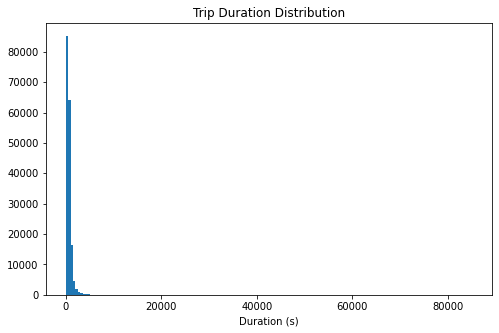

In [20]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, ford_gobike_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_gobike_data, x = 'duration_sec', bins = bins)
plt.title("Trip Duration Distribution")
plt.xlabel('Duration (s)')
plt.show()

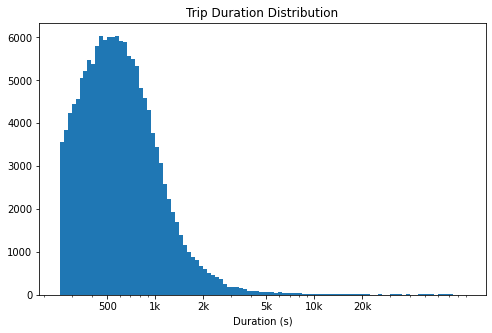

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(ford_gobike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_gobike_data, x = 'duration_sec', bins = bins)
plt.title("Trip Duration Distribution")
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], ["500", '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (s)')
plt.show()

Trip duration has a long-tailed distribution, with a lot of trip on the low price end, and few on the high price end. When plotted on a log-scale, the trip duration in seconds distribution is unimodal, with the peak between 500 and 1000. There's a steep jump in frequency right from the start and also in descent.

<a id="average-diff-start-end-time"></a>

Next: Find how much the average number of trips that start in an hour varies from the average number of trips that end in an hour

In [22]:
start_time_df = pd.DataFrame(ford_gobike_data["start_time"])
start_time_df["count"] = 1
# start_time_df

In [23]:
end_time_df = pd.DataFrame(ford_gobike_data["end_time"])
end_time_df["count"] = 1
# end_time_df

In [24]:
hourly_start_time_df = start_time_df.groupby(pd.Grouper(key='start_time', freq='60min')).sum()
hourly_start_time_df["hour"] = hourly_start_time_df.index.time
hourly_start_time_df = hourly_start_time_df.groupby(["hour"]).mean()
hourly_start_time_df =hourly_start_time_df.reset_index()
# hourly_start_time_df

In [25]:
hourly_end_time_df = end_time_df.groupby(pd.Grouper(key='end_time', freq='60min')).sum()
hourly_end_time_df["hour"] = hourly_end_time_df.index.time
hourly_end_time_df = hourly_end_time_df.groupby(["hour"]).mean()
hourly_end_time_df =hourly_end_time_df.reset_index()
# hourly_end_time_df

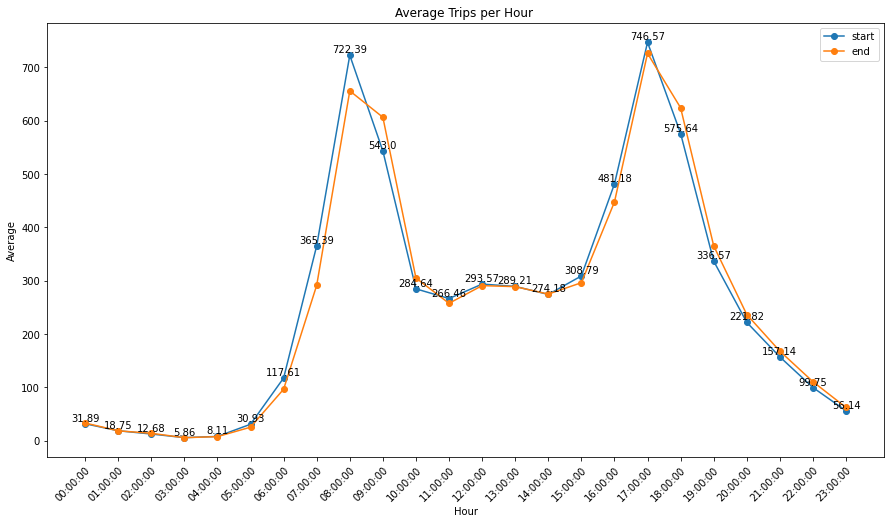

In [26]:
fig, ax = plt.subplots(figsize=[15, 8])
plt.plot("count", data=hourly_start_time_df, marker="o")
plt.plot("count", data=hourly_end_time_df, marker="o")
plt.title("Average Trips per Hour ")
plt.xlabel("Hour")
plt.ylabel("Average")
ax.set_xticks(np.arange(hourly_start_time_df.shape[0]), hourly_start_time_df["hour"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

plt.legend(["start", "end"])

# loop through each pair of locations and labels
count = 0
for val in hourly_start_time_df["count"]:
    plt.text(count, val + 5, str(round(val, 2)), ha = 'center', color = 'black');
    count += 1

From the chart, there is very little difference in the average number of trips that start and end within an hour. Also, the maximum of the start and end values occur at 8 AM and 5 PM

<a id="user-type-distribution"></a>

Next up: user type distribution

In [27]:
user_type_grouping = ford_gobike_data["user_type"].value_counts()
# user_type_grouping

In [28]:
def pie_labelling(pct, allvals, is_raw=True):
    absolute = pct / 100.*np.sum(allvals)
    fmt_str = "{:,.0f}\n({:.2f}%)" if is_raw else "{:.2f}%"
    return fmt_str.format(absolute, pct)

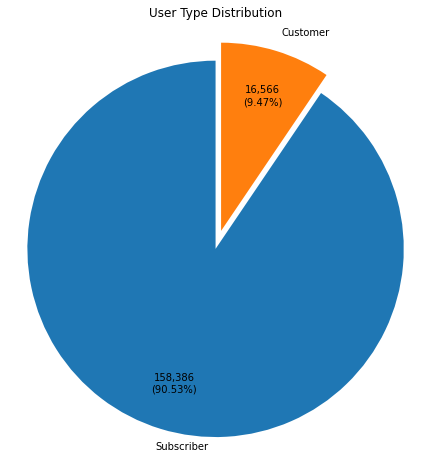

In [29]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
explode = (0, 0.1)

plt.pie(user_type_grouping, labels=user_type_grouping.index, explode=explode, 
    autopct=lambda pct: pie_labelling(pct, user_type_grouping, True), 
    startangle=90, center=(0.5,0.5), frame=True, pctdistance=0.75);


plt.title("User Type Distribution")
plt.xticks([]);
plt.yticks([]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

Most bike users under this project have subscribed to the project, that is 158,386 persons representing 90.53% of all users.

<a id="gender-distribution"></a>
    
Next up: gender distribution

In [30]:
gender_grouping = ford_gobike_data["member_gender"].value_counts()
gender_grouping

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

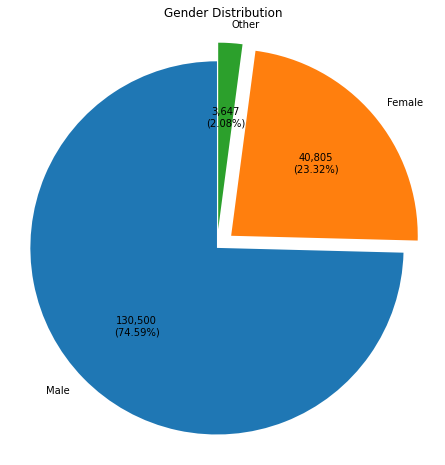

In [31]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
explode = (0, 0.1, 0.1)

plt.pie(gender_grouping, labels=gender_grouping.index, explode=explode, 
        autopct=lambda pct: pie_labelling(pct, gender_grouping, True), 
        startangle=90, center=(0.5, 0.5), frame=True)
plt.title("Gender Distribution")
plt.xticks([]);
plt.yticks([]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

From this visualization, it can be noted that most of the bikers are males, representing 74.59% as compared to Females and Others

<a id="gender-day-of-week-distribution"></a>

Next up: Total numbers of trip by gender per day of week

This is to determine to what proportions the number of gender make trips on specific days (Monday, Tuesday, Wednesday ...) 

In [32]:
day_gender_df = ford_gobike_data[["start_day_name", "member_gender"]].value_counts().reset_index(name="count")
# day_gender_df

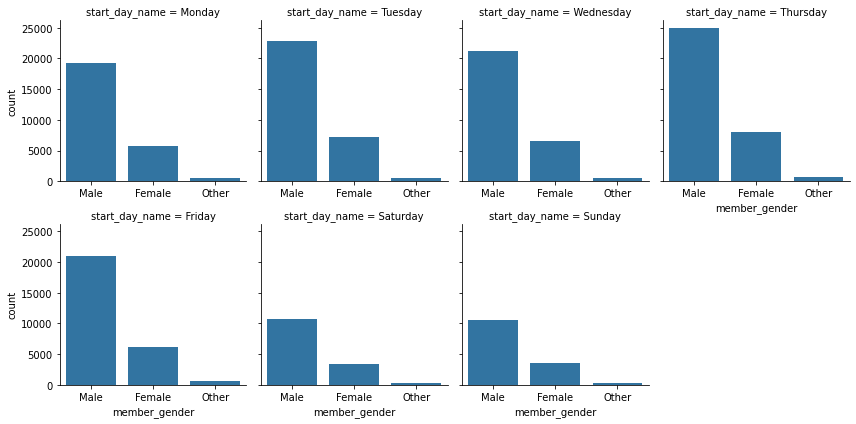

In [33]:
fg = sns.FacetGrid(data=day_gender_df, col="start_day_name", col_order=day_names, col_wrap=4, sharex=False)
fg.map_dataframe(sns.barplot, x="member_gender", y="count");

For each day, the male gender clearly dominates other gender with respect to the persons who ride the bike

<a id="trip-day-proportion"></a>

Next up: Proportion of trips for each day in the week

This is to determine to what proportions the number of trips are related to days (Monday, Tuesday, Wednesday ...)

In [34]:
trip_by_day_of_week = ford_gobike_data["start_day_name"]
# trip_by_day_of_week

In [35]:
day_of_week_prop = trip_by_day_of_week.groupby(trip_by_day_of_week).count() / ford_gobike_data.shape[0]
# day_of_week_prop

In [36]:
day_of_week_prop = day_of_week_prop.reindex(day_names)

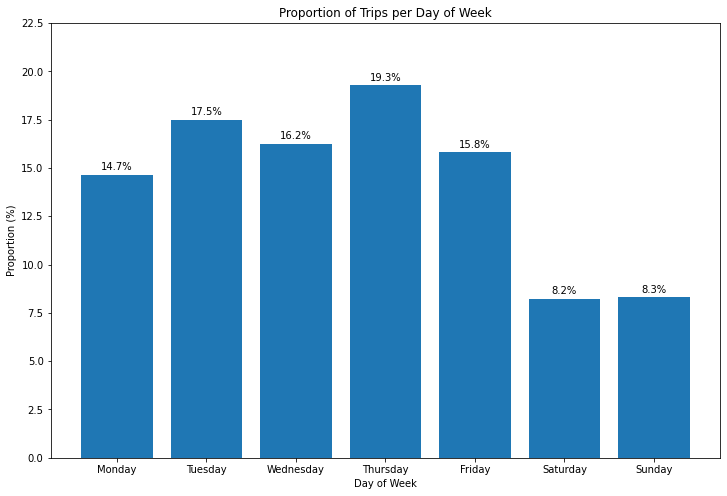

In [37]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.bar(data=day_of_week_prop, x=day_names, height=day_of_week_prop)
plt.title("Proportion of Trips per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Proportion (%)")
ax.set_yticks(np.arange(0, 0.25, 0.025), labels=[ str(x) for x in np.arange(0, 25, 2.5) ])

# loop through each pair of locations and labels
count = 0
for label in day_of_week_prop.index:
    # get the text property for the label to get the correct count
    pct_string = '{:0.1f}%'.format(100*day_of_week_prop.loc[label])
    plt.text(count, day_of_week_prop.loc[label] + 0.0025, pct_string, ha = 'center', color = 'black');
    count += 1

Weekdays have the largest proportions which translate into number of trips (sum of 83.5%) as compared to the weekends

<a id="social-generations-proportions"></a>
Next is to determine the social generation of the bikers.


From wikipedia, A generation refers to all of the people born and living at about the same time, regarded collectively.[1] It can also be described as, "the average period, generally considered to be about 20–⁠30 years, during which children are born and grow up, become adults, and begin to have children. https://en.wikipedia.org/wiki/Generation#List_of_social_generations

This categorization of the data would give insight to which social group patronize the bike services. This maybe skewed to the generation which has the most number of persons alive with the timeframe the data was recorded.

In [38]:
social_generation_prop = ford_gobike_data["social_generation"].groupby(ford_gobike_data["social_generation"]).count() / ford_gobike_data.shape[0]
social_generation_prop = social_generation_prop.reindex(gen_choice_list)
# social_generation_prop

posx and posy should be finite values
posx and posy should be finite values


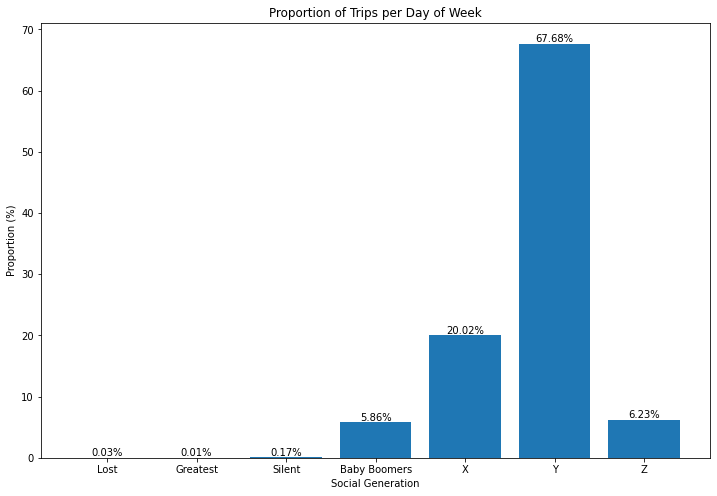

In [39]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.bar(data=social_generation_prop, x=gen_choice_list, height=social_generation_prop)
plt.title("Proportion of Trips per Day of Week")
plt.xlabel("Social Generation")
plt.ylabel("Proportion (%)")

ax.set_yticks(np.arange(0, 0.8, 0.1), labels=[ str(x) for x in np.arange(0, 80, 10) ])

# loop through each pair of locations and labels
count = 0
for label in social_generation_prop.index:
    # get the text property for the label to get the correct count
    pct_string = '{:0.2f}%'.format(100*social_generation_prop.loc[label])
    plt.text(count, social_generation_prop.loc[label] + 0.0025, pct_string, ha = 'center', color = 'black');
    count += 1

From the chart above, it can be noted that Generation Y, that is persons born between 1981 and 1996 patronize the bike services more that all other generations.

<a id="top-10-start-stations"></a>

Find the top 10 start stations.

In here, I would want to find the top 10 start and end stations.

In [40]:
start_station_top_10 = ford_gobike_data["start_station_name"].value_counts().head(10).reset_index(name="count")
start_station_top_10 = start_station_top_10.rename(columns={"index": "station_name"})
start_station_top_10 = start_station_top_10.sort_values(by=["count"], ascending=True)
# start_station_top_10

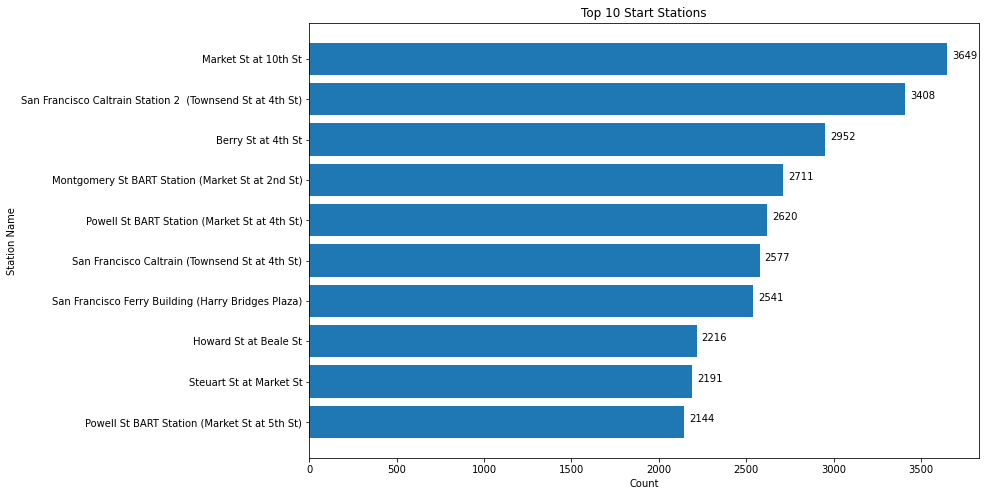

In [41]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.barh(data=start_station_top_10, y="station_name", width="count")#, width=5)
plt.title("Top 10 Start Stations")
plt.xlabel("Count")
plt.ylabel("Station Name")

# loop through each pair of locations and labels
count = 0
for idx, row in start_station_top_10.iterrows():
    plt.text(row["count"] + 100, count, row["count"], ha = 'center', color = 'black');
    count += 1

<a id="top-10-end-stations"></a>

Find the top 10 end stations

In [42]:
end_station_top_10 = ford_gobike_data["end_station_name"].value_counts().head(10).reset_index(name="count")
end_station_top_10 = end_station_top_10.rename(columns={"index": "station_name"})
end_station_top_10 = end_station_top_10.sort_values(by=["count"], ascending=True)
# end_station_top_10

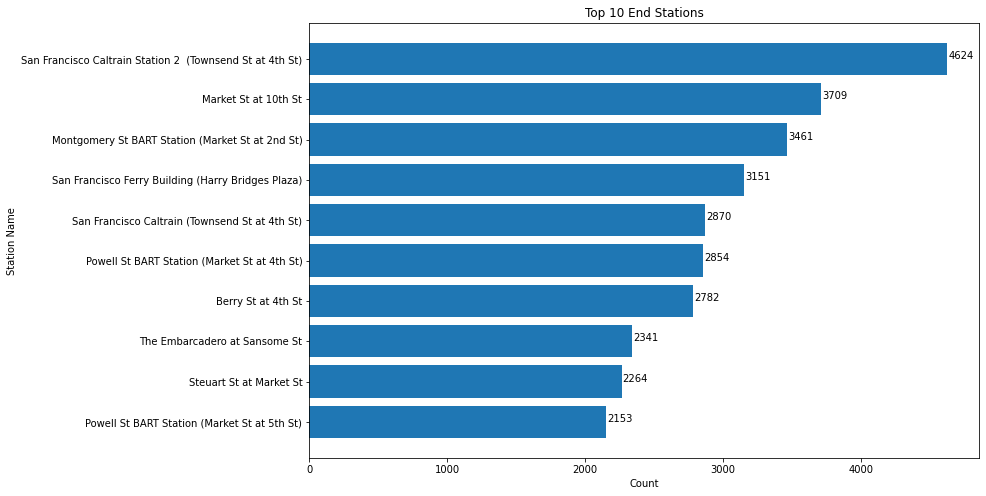

In [43]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.barh(data=end_station_top_10, y="station_name", width="count")#, width=5)
plt.title("Top 10 End Stations")
plt.xlabel("Count")
plt.ylabel("Station Name")

# loop through each pair of locations and labels
count = 0
for idx, row in end_station_top_10.iterrows():
    plt.text(row["count"] + 100, count, row["count"], ha = 'center', color = 'black');
    count += 1

<a id="day-crossover-trips"></a>

Next: Trips which crossed over to the next day

First, I would check if there are trips that span more than one (1) day. 

In [44]:
t = ford_gobike_data["end_time"].dt.day_of_year - ford_gobike_data["start_time"].dt.day_of_year
t.describe()

count    174952.000000
mean          0.001618
std           0.040187
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [45]:
# trip_spans_2_days_df = ford_gobike_data[t.replace({1: True, 0: False})]
# trip_spans_2_days_df

From the data above, there are trips that span 2 consercutive days but not three (3) consercutive days.

In [46]:
u = t.value_counts()
u.index = ["Single Day", "Two Days"]
u

Single Day    174669
Two Days         283
dtype: int64

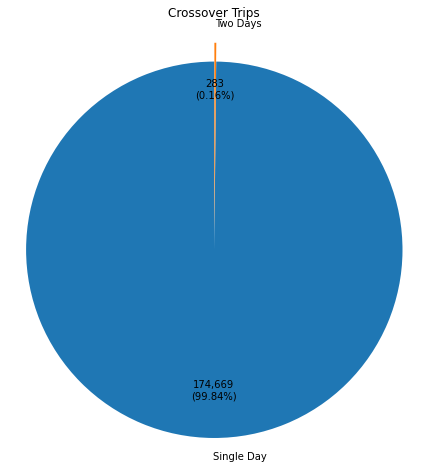

In [47]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
explode = (0, 0.1)

plt.pie(u, labels=u.index, explode=explode, 
    autopct=lambda pct: pie_labelling(pct, u, True), 
    startangle=90, center=(0.5,0.5), frame=True, pctdistance=0.75);


plt.title("Crossover Trips")
plt.xticks([]);
plt.yticks([]);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

Investigate the duration of the crossover trips

In [48]:
u = ford_gobike_data[ford_gobike_data["start_day_name"] != ford_gobike_data["end_day_name"]]
u["duration_min"].describe()

count     283.000000
mean      339.763840
std       447.000899
min         1.933333
25%        11.658333
50%        33.583333
75%       772.525000
max      1409.133333
Name: duration_min, dtype: float64

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

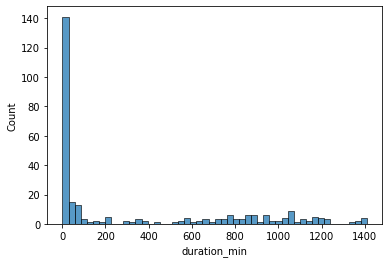

In [49]:
u = ford_gobike_data[ford_gobike_data["end_time"].dt.date > ford_gobike_data["start_time"].dt.date]

sns.histplot(data=u, x="duration_min", bins=50)

Most day crossover trips lasted less than 2.5 hours

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Start of trip has high correlation hour of day. The resulting chart showed increased activity at 8-9 AM and 4-5 PM on weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There were very few trips (283, 0.16%) that crossed over to the next day. 

Only 283 trips representing 0.16% of the total number of trips span more than one day.

<a id="bivariate-exploration"></a>


## Bivariate Exploration

<a id="rel-age-duration-min"></a>

To start off with, I want to look at the relationship between _age_ and _duration of trip in minutes_.

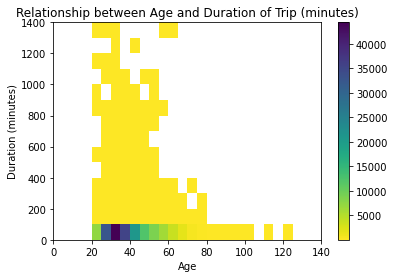

In [50]:
age_bins = np.arange(0, ford_gobike_data["age"].max(), 5)
duration_min_bins = np.arange(0, ford_gobike_data["duration_min"].max(), 100)

plt.hist2d(data=ford_gobike_data, x="age", y="duration_min", bins=[age_bins, duration_min_bins], cmin=0.5, cmap='viridis_r');
plt.colorbar()

plt.title("Relationship between Age and Duration of Trip (minutes)");
plt.xlabel("Age");
plt.ylabel("Duration (minutes)");

From the chart:
* bikers between the ages of 20 and 50 have the longest trips in minutes
* trips with duration greater than 200 minutes are completed by bikers between the ages of 20 and 60
* bikers older than 80 years do not ride bikes more than 100 minutes

<a id="each-day-top-5-start-stations"></a>

For each day, find the Top 5 start stations. This can aid the project managers to know where to allocate more bikes on a particular day

In [51]:
start_day_station_top_5 = ford_gobike_data.groupby(["start_day_name"])["start_station_name"].value_counts().groupby(level=0).head(5).to_frame('counts').reindex(day_names, level=0)#.reset_index()
# start_day_station_top_5

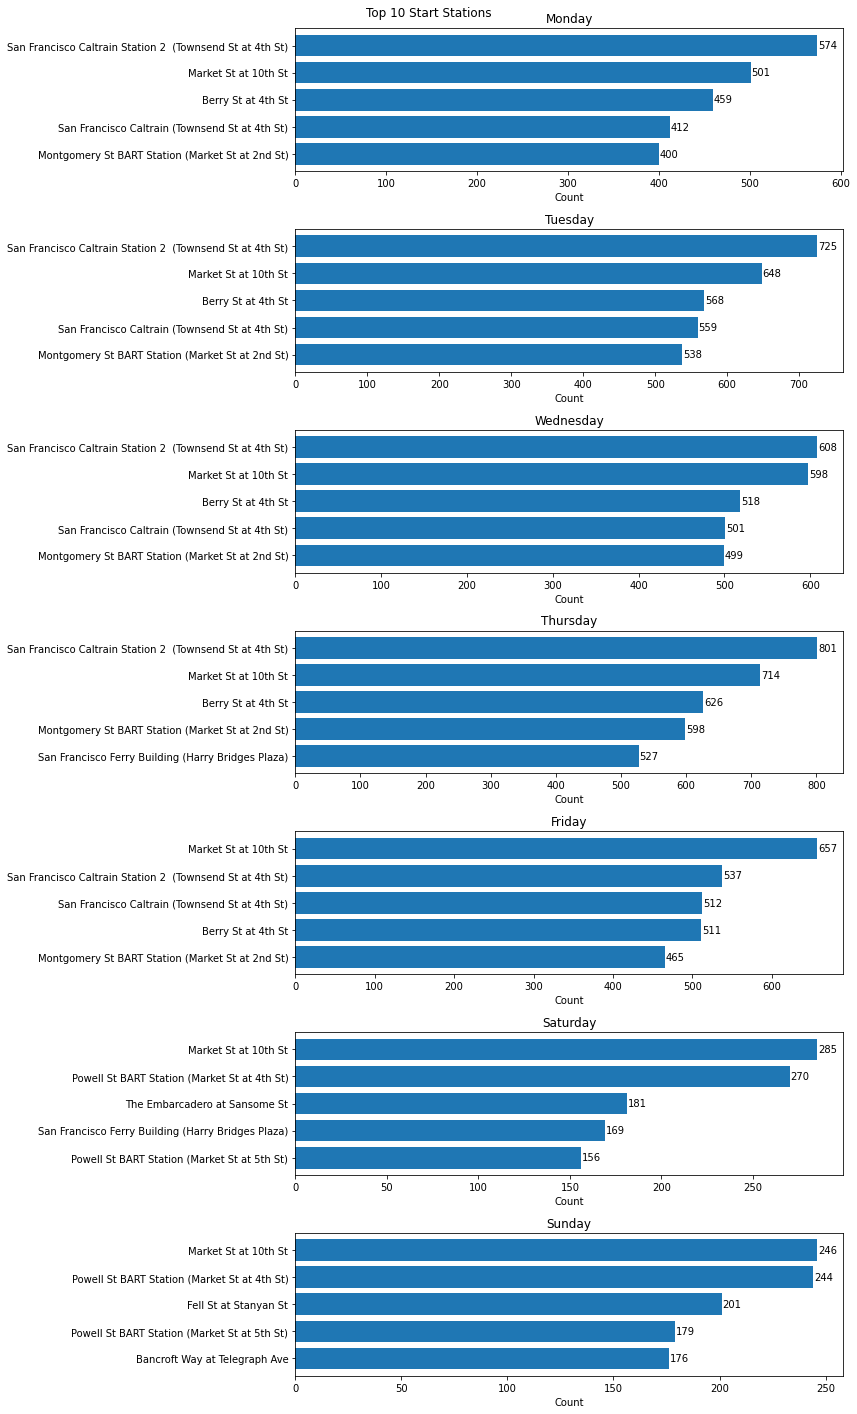

In [52]:
fig, axs = plt.subplots(7, 1, sharey="row", figsize=[12, 20])
plt.suptitle("Top 10 Start Stations")

idx = 0
for sub_df in start_day_station_top_5.index.get_level_values(0).unique():
    data = start_day_station_top_5.loc[sub_df].reset_index().sort_values(by=["counts"], ascending=True)

    axs[idx].barh(data=data, y="start_station_name", width="counts")
    axs[idx].set_title(sub_df)
    axs[idx].set_xlabel("Count")

    # loop through each pair of locations and labels
    count = 0
    delta = data["counts"].max() / 50
    for idx_1, row in data.iterrows():
        axs[idx].text(row["counts"] + delta, count, row["counts"], ha='center', va='center', color='black');
        count += 1
    
    idx += 1

plt.tight_layout()

For weekdays, most trips start from:
* San Francisco Caltrain Station 2 (Townsend St at 4th St)
* Market St at 10th St
* Berry St at 4th St

On weekends, most trips end at:
* Market St at 10th St
* Powell St BART Station (Market St at 4th St)

<a id="each-day-top-5-end-stations"></a>

For each day, find the Top 5 end stations. This can aid the project managers to know where to allocate more bike parking spaces on a particular day.

In [53]:
end_day_station_top_5 = ford_gobike_data.groupby(["end_day_name"])["end_station_name"].value_counts().groupby(level=0).head(5).to_frame('counts').reindex(day_names, level=0)#.reset_index()
# end_day_station_top_5

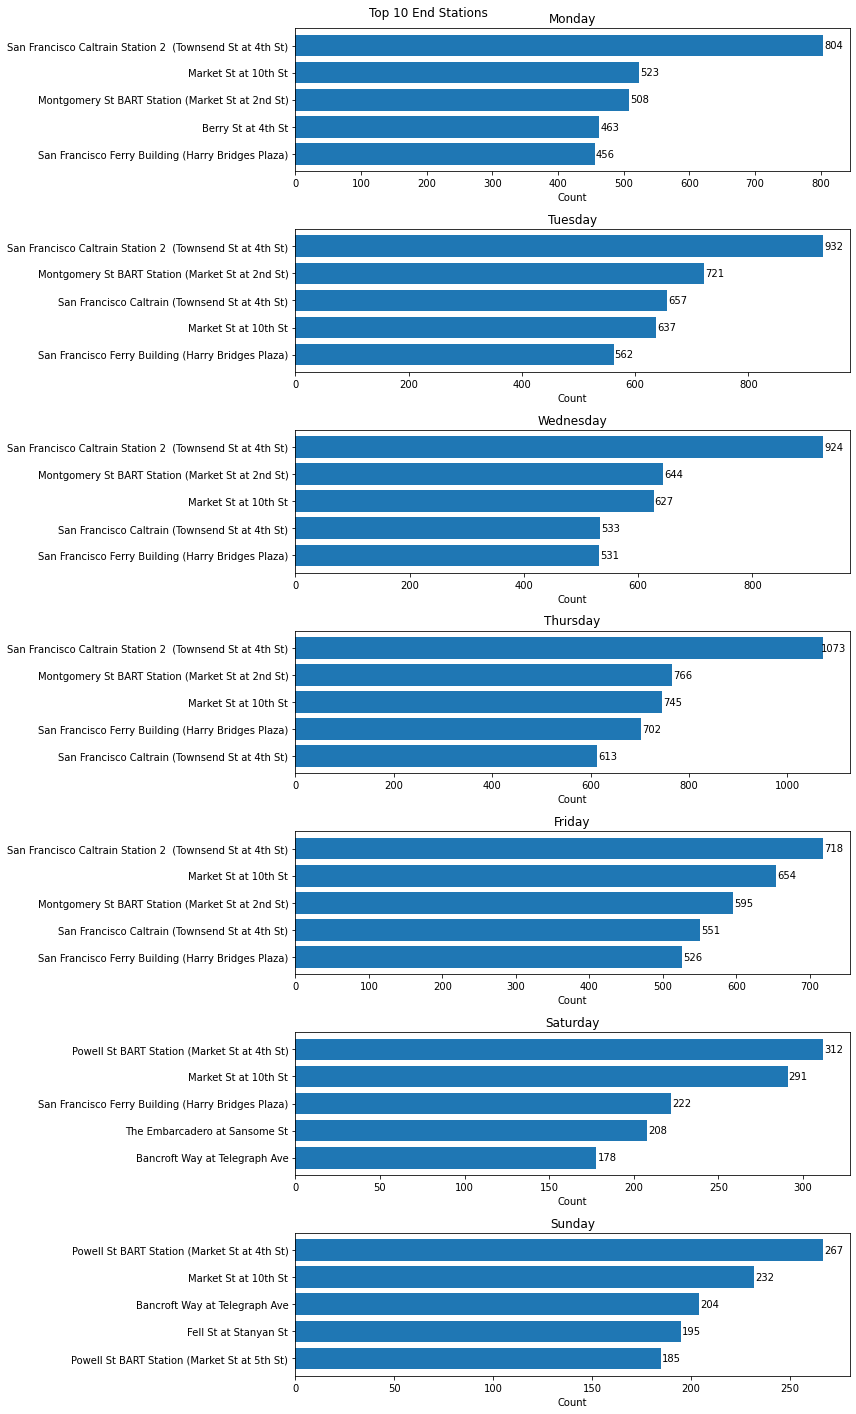

In [54]:
fig, axs = plt.subplots(7, 1, sharey="row", figsize=[12, 20])
plt.suptitle("Top 10 End Stations")

idx = 0
for sub_df in end_day_station_top_5.index.get_level_values(0).unique():
    data = end_day_station_top_5.loc[sub_df].reset_index().sort_values(by=["counts"], ascending=True)

    axs[idx].barh(data=data, y="end_station_name", width="counts")
    axs[idx].set_title(sub_df)
    axs[idx].set_xlabel("Count")

    # loop through each pair of locations and labels
    count = 0
    delta = data["counts"].max() / 50
    for idx_1, row in data.iterrows():
        axs[idx].text(row["counts"] + delta, count, row["counts"], ha='center', va='center', color='black');
        count += 1
    
    idx += 1

plt.tight_layout()

For weekdays, most trips end at either:
* San Francisco Caltrain Station 2 (Townsend St at 4th St)
* Market St at 10th St
* Montgomery St BART Station (Market St at 2nd St)

On weekends, most trips end at:
* Market St at 10th St
* Powell St BART Station (Market St at 4th St)

<a id="day-of-week-by-social-generation"></a>

Next: Find the number of trips made on days of the week by social generation
    
    
This analysis is to ascertain if the trend of the number of trips by social generation on days of the week conforms to the trend of trip by day of week

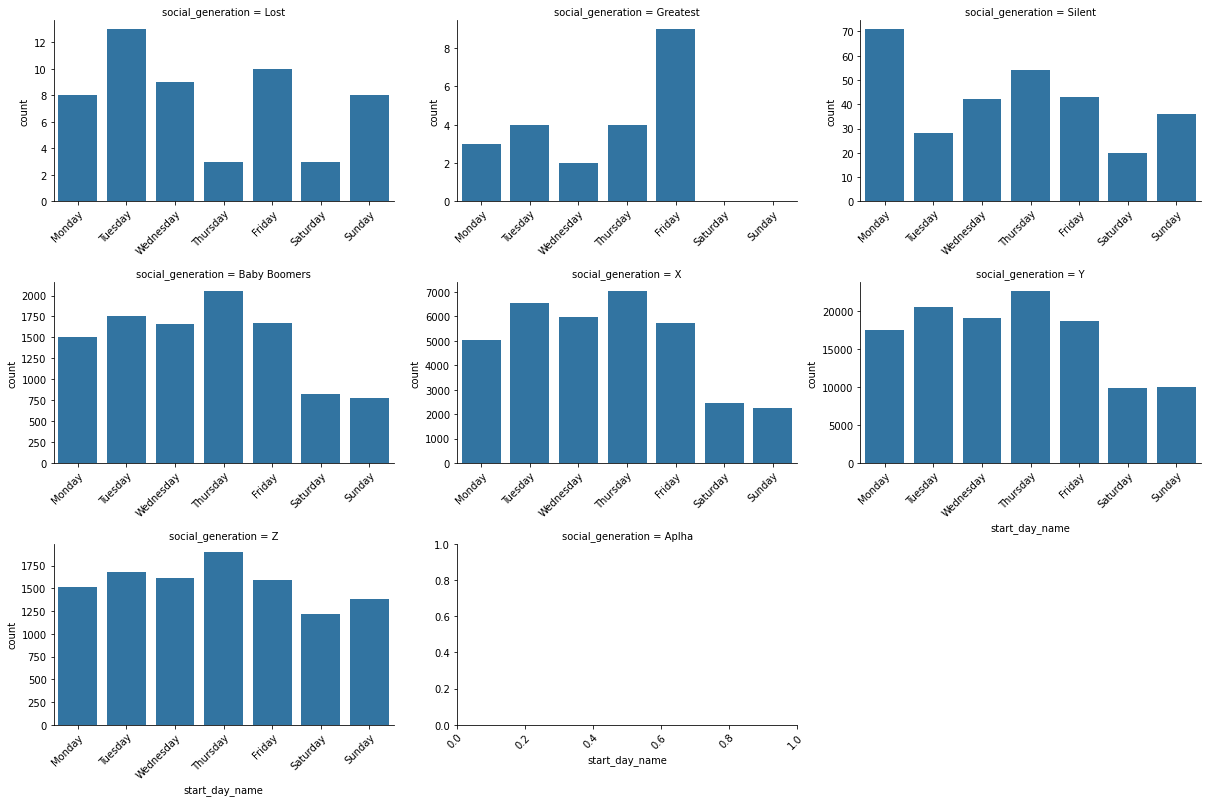

In [67]:
fg = sns.FacetGrid(data=ford_gobike_data, col="social_generation", col_wrap=3, sharex=False, sharey=False, col_order=gen_choice_list, margin_titles=True, height=3.75, aspect=1.5)
fg.map_dataframe(sns.countplot, x="start_day_name", order=day_names)

for ax in fg.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
    
fg.tight_layout()

In [56]:
ford_gobike_data[ford_gobike_data["social_generation"] == "Alpha"].shape

(0, 24)

As seen above:
* Only the Baby Boomers, X and Y social generations have their data conforming to the main trend of trips by day of week (that is maximum number of trips on Thurday with both Saturday and Sunday having the least and almost of the same level).
* The Greatest generation does not make trips on weekends.
* The Silent generation is more active on Mondays as compared to the rest of the days of the week.
* For the Z generation, they are active throughout the week with their numbers ranging between 1250 and 2000 trips for each day of the week.
* There is no data for the Alpha generation as such the chart is empty.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between day of week and proportion of trips showed that most trips were carried out on weekdays. This points to bikers using this as a mode of transportation to and from work.

The relationship between age and trip duration was clear. 
* Bikers between the ages of 20 and 50 have the longest trips in minutes
* Trips with duration greater than 200 minutes are completed by bikers between the ages of 20 and 60
* Bikers older than 80 years do not ride bikes more than 100 minutes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The top 5 start and end stations are the same for every weekday. This may mean these are the places with most offices or work places/activities

<a id="multivariate-exploration"></a>

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is the relationship between day of week, hour of day, user type and the top 5 start stations

First thing is to find the top 5 start stations. 

In [57]:
top_5_start_stations_min = ford_gobike_data["start_station_name"].value_counts().head(5)
top_5_start_stations_min = top_5_start_stations_min.index.str.slice(stop=15).to_numpy()
top_5_start_stations_min

array(['Market St at 10', 'San Francisco C', 'Berry St at 4th',
       'Montgomery St B', 'Powell St BART '], dtype=object)

<a id="top-5-start-stations-day-trend"></a>

Next: Trend for top 5 Start Stations by Day of Week

I would like to know the daily trend of the top 5 start stations by hour. To normalize the data, I took the proportions by hour and plotted a chart for each day of the week.

In [58]:
top_5_start_stations_df = ford_gobike_data[ford_gobike_data["start_station_name_min"].isin(top_5_start_stations_min)]
top_5_start_stations_df["start_station_name_min"] = top_5_start_stations_df["start_station_name_min"].str.slice(stop=15)
# top_5_start_stations_df

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
day_of_week_count = top_5_start_stations_df.groupby(["start_station_name_min", "start_day"])["bike_id"].count()
# day_of_week_count

In [60]:
time_df = top_5_start_stations_df.groupby(["start_station_name_min", "start_day", "start_hour"]).count()["bike_id"]
# time_df

In [61]:
t = pd.DataFrame(time_df / day_of_week_count).reset_index()
# t = pd.DataFrame(time_df).reset_index()
t = t.rename(columns={"bike_id": "proportion"})
# t

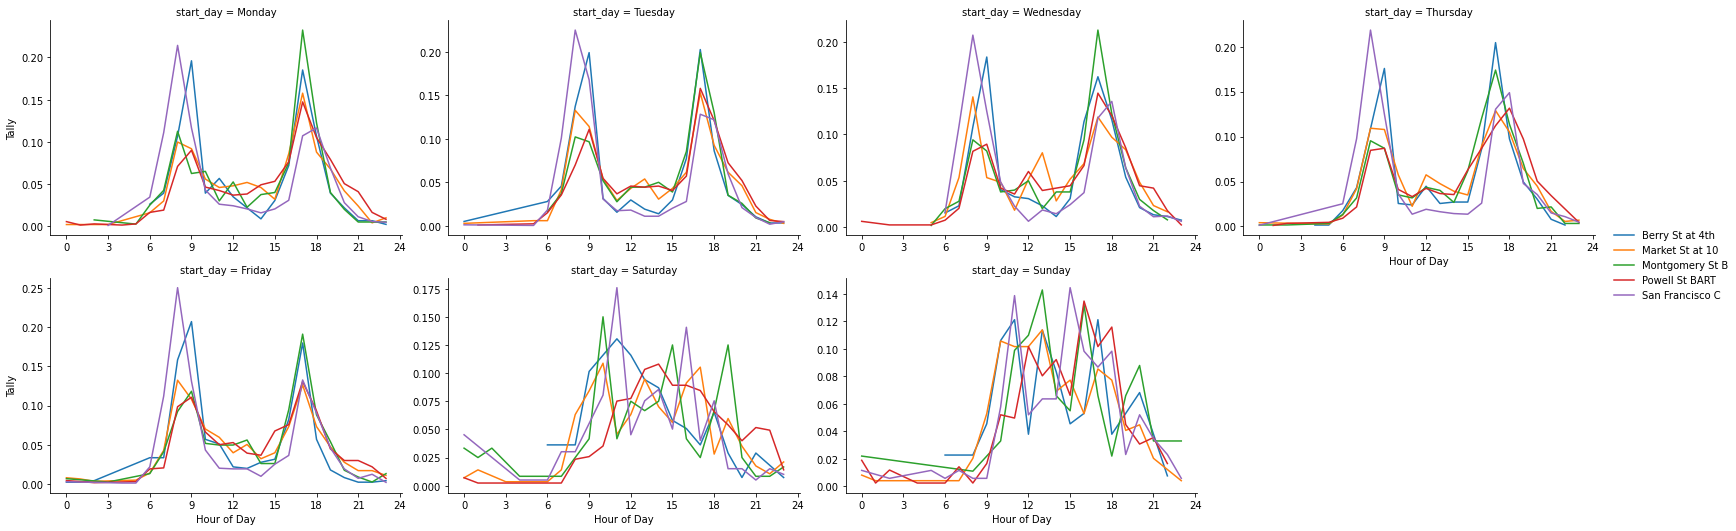

In [62]:
fg = sns.FacetGrid(data=t, col="start_day", margin_titles=True, col_wrap=4, col_order=day_names, height=3.75, aspect=1.5, sharex=False, sharey=False)
fg.map_dataframe(sns.lineplot, x="start_hour", y="proportion", hue="start_station_name_min")
fg.set_axis_labels("Hour of Day", "Tally")
fg.add_legend()
fg.set(xticks=np.arange(0, 25, 3))

For weekends:
* trips pick-up after 7 AM

All weekdays have similar charts were:
* the number of trips pick up from 5 AM  
* the maximum number of trips start at 8-9 AM and 5 PM

This weekday pattern mimics office work hours were workers are to reach their offices by 8-9 AM and leave by 4-5 PM. This might mean most riders often use this as a mode of transportation to and from work on weekdays.



<a id="top-5-start-stations-day-user-type-trend"></a>

Next: Trend for top 5 Start Stations by Day of Week and User Type

In [63]:
day_of_week_count = top_5_start_stations_df.groupby(["user_type", "start_station_name_min", "start_day_name",])["bike_id"].count()
# day_of_week_count

In [64]:
time_df = top_5_start_stations_df.groupby(["user_type", "start_station_name_min", "start_day_name", "start_hour"]).count()["bike_id"]
# time_df

In [65]:
t = pd.DataFrame(time_df / day_of_week_count).reset_index()
t = t.rename(columns={"bike_id": "proportion"})
# t

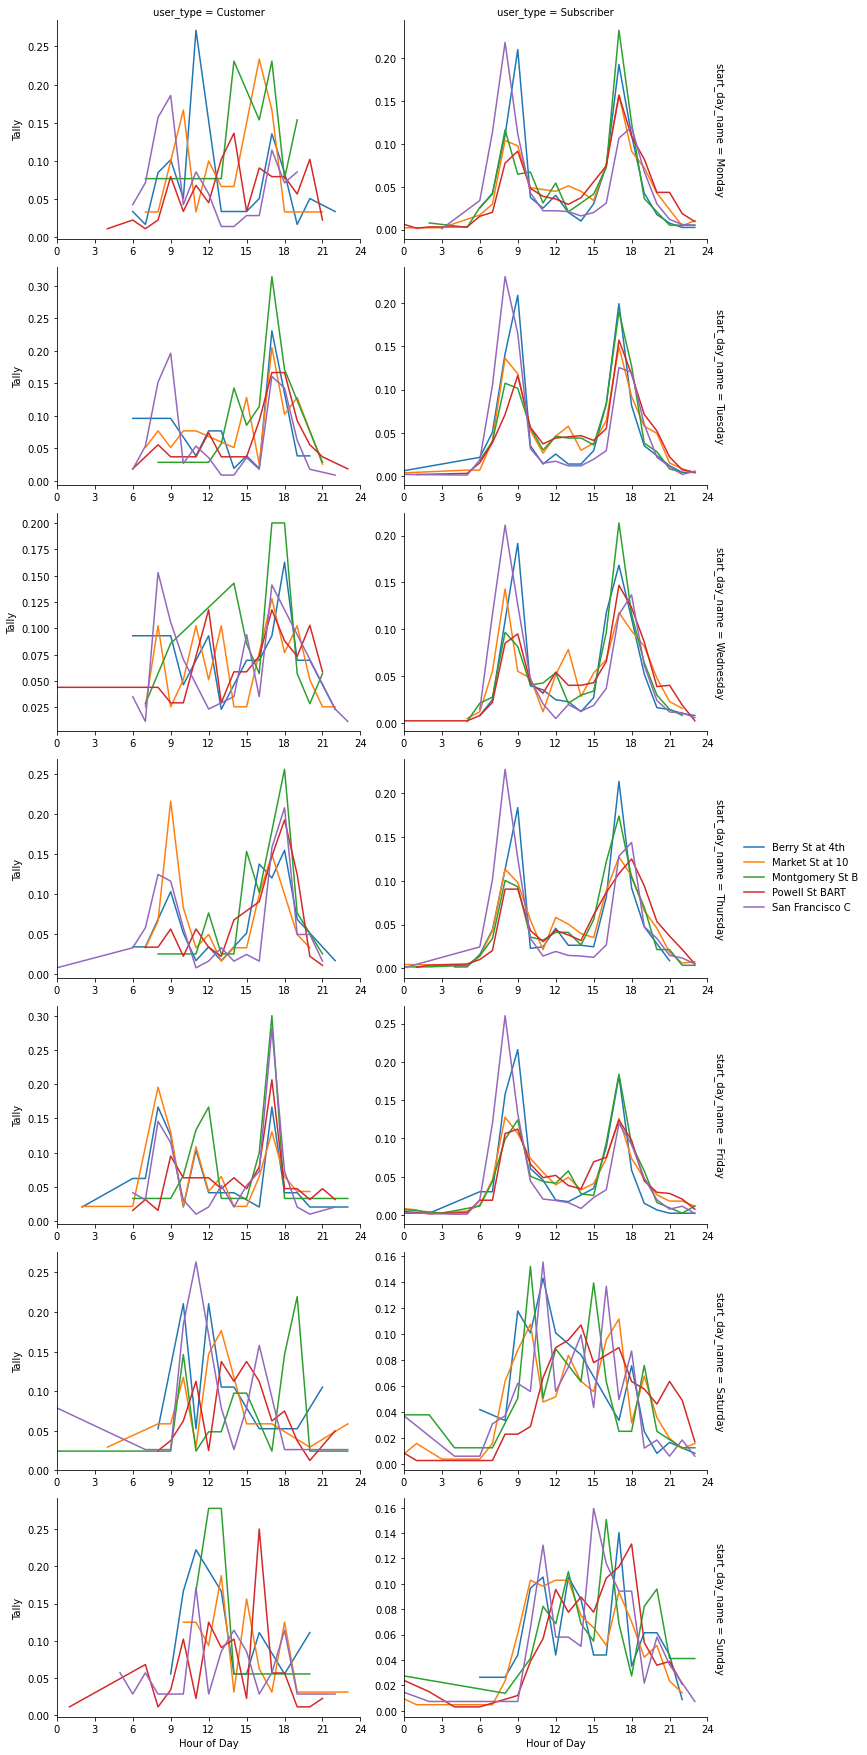

In [66]:
fg = sns.FacetGrid(data=t, col="user_type", margin_titles=True, row="start_day_name", row_order=day_names, height=3.5, aspect=1.5, sharex=False, sharey=False)
fg.map_dataframe(sns.lineplot, x="start_hour", y="proportion", hue="start_station_name_min", ci=None)
fg.set_axis_labels("Hour of Day", "Tally")
fg.add_legend()
fg.set(xlim=(0, 24), xticks=np.arange(0, 25, 3))

The _Customer_ user type tends to conform with the office hours trend where there is peak activity at 8-9 AM and 4-5 PM on weekdays.

On the other hand, the _Subscriber_ user type only conforms to the office hours trend for the afternoon (that is 4-5 PM) on Tuesday, Wednesday, Thursday and Friday only.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As observed and described earlier, there is a relationship between the time (hour od day) trips are started and the day of the week. 

It seems clear that most subscriber memberships use the bikes for transportation to and from offices for week days for the top 5 start stations.

There was no clear trend to notice on weekends (Staturday and Sunday) thus it can be said that most of the trips on weekends were not for office transportation.

### Were there any interesting or surprising interactions between features?

Nothing of special interest

## Conclusions

>* The relationship between day of week and proportion of trips showed that most trips were carried out on weekdays. This points to bikers using this as a mode of transportation to and from work.
>* There is increased activity at 8-9 AM and 4-5 PM on weekdays
>* Only 283 trips representing 0.16% of the total number of trips span more than one day.
>* The top 5 start and end stations are the same for every weekday. This may mean these are the places with most offices or work places/activities
>* The relationship between age and trip duration was clear:
>    * Bikers between the ages of 20 and 50 have the longest trips in minutes
>    * Trips with duration greater than 200 minutes are completed by bikers between the ages of 20 and 60
>    * Bikers older than 80 years do not ride bikes more than 100 minutes